**What is Decision Tree?**
*A decision tree, which has a hierarchical structure made up of root, branches, internal, and leaf nodes, is a non-parametric supervised learning approach used for classification and regression applications.*

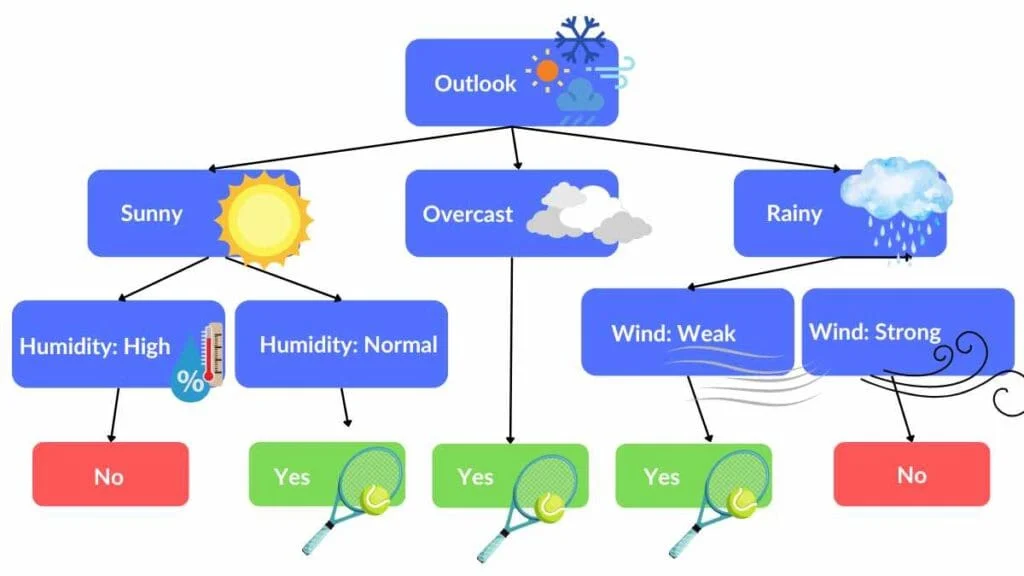

**Decision Tree Terminologies**

1. ***Root Node:***

 The initial node at the beginning of a decision tree, where the entire population or dataset starts dividing based on various features or conditions.

2. ***Decision Nodes:***

 Nodes resulting from the splitting of root nodes are known as decision nodes. These nodes represent intermediate decisions or conditions within the tree.

3. ***Leaf Nodes:***

 Nodes where further splitting is not possible, often indicating the final classification or outcome. Leaf nodes are also referred to as terminal nodes.

4. ***Sub-Tree:***

 Similar to a subsection of a graph being called a sub-graph, a sub-section of a these tree is referred to as a sub-tree. It represents a specific portion of the decision tree.

5. ***Pruning:***

 The process of removing or cutting down specific nodes in a tree to prevent overfitting and simplify the model.

6. ***Branch / Sub-Tree:***

  A subsection of the entire is referred to as a branch or sub-tree. It represents a specific path of decisions and outcomes within the tree.

7. ***Parent and Child Node:***

 In a decision tree, a node that is divided into sub-nodes is known as a parent node, and the sub-nodes emerging from it are referred to as child nodes. The parent node represents a decision or condition, while the child nodes represent the potential outcomes or further decisions based on that condition.

> **Decision Tree Split Criteria**

**What is Entropy? (Impurity Measure)**

1. Think of entropy as a way to check how mixed the data is.

2. If all items are the same → entropy is 0 (pure).

3. If items are half-half (like 50% pass, 50% fail) → entropy is high (impure).

Simple idea:

* Pure → 0

* Mixed → High

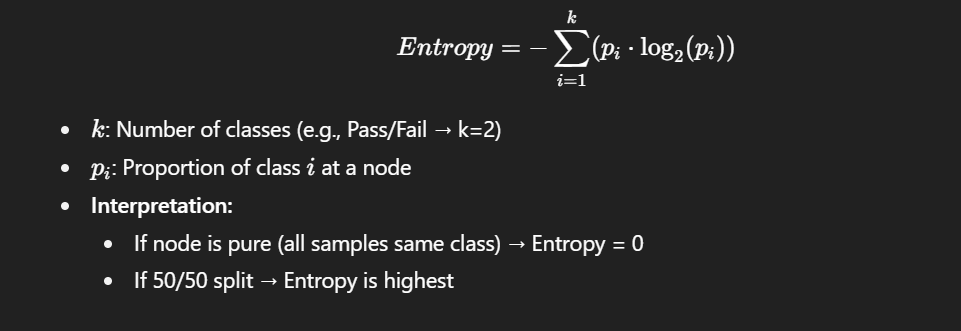

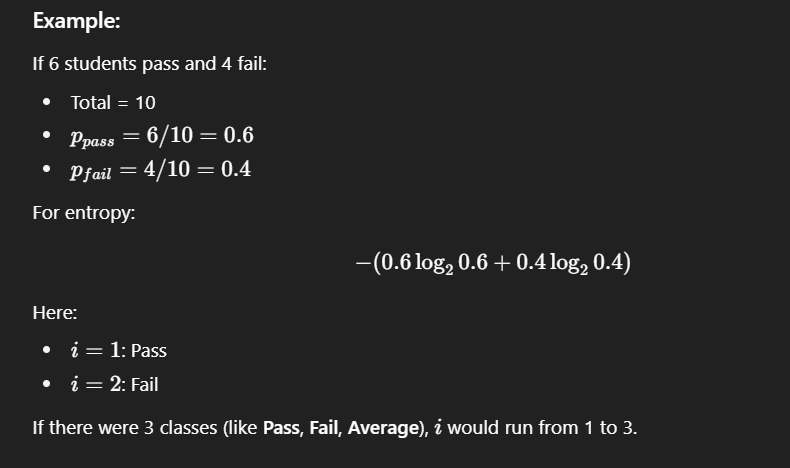

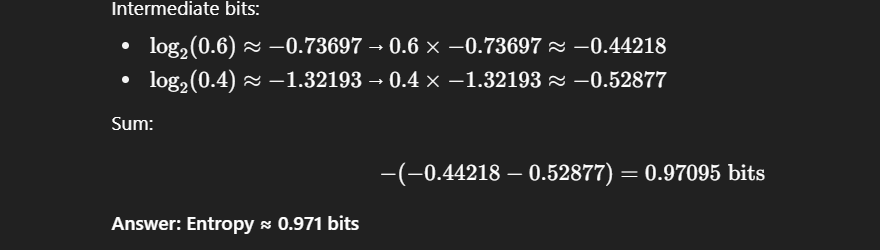

**What is Gini Impurity?**

1. It’s another way to check how mixed the data is.

2. Works almost like entropy, just a different formula.

 - If all items are same → Gini = 0

 - More mixed → Higher Gini

- Both entropy and Gini tell how messy a node is.

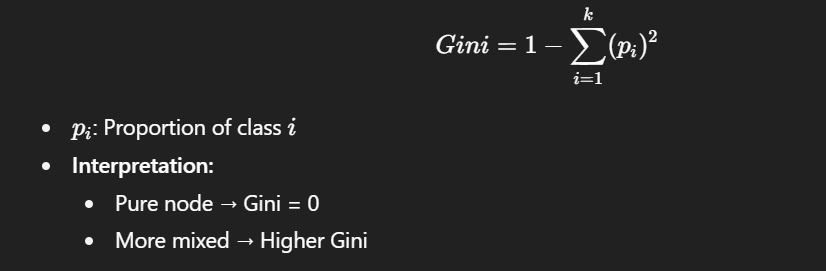

**What is Information Gain? (Choosing the Best Question)**

1. When building a decision tree, we ask:
   - "Which question (feature) splits the data best?"

2. Information Gain tells us how much the “mess” (impurity) is reduced after a split.

- We choose the question with highest information gain.

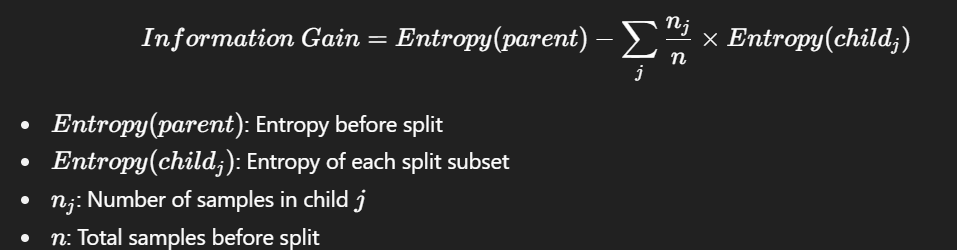

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


In [4]:
# drop deck column
df.drop('deck', axis=1, inplace=True)

#impute missing values of age, and fare using median
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# impute missing values of embark and embarked_town using mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embark_town', 'embarked']] = imputer.fit_transform(df[['embark_town', 'embarked']])

In [5]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [7]:
# Encode the categorical and object variables using for loop and labelencoder
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [9]:
# split the data into X and y
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# create and train teh model with pred
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 23]
 [21 53]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



In [11]:
#compare testing accuracy vs training accuacy draw graph
print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Testing accuracy: {model.score(X_test, y_test)}')

Training accuracy: 0.9789325842696629
Testing accuracy: 0.7541899441340782


In [12]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
import os

# Create the directory if it doesn't exist
os.makedirs('./saved_models', exist_ok=True)

export_graphviz(model, out_file='./saved_models/Decision_tree_03.dot', feature_names=X.columns, filled=True, rounded=True)

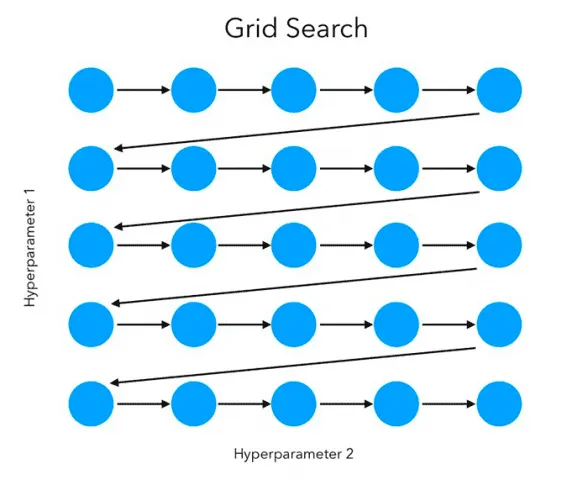

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [14]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Create a new Decision Tree Classifier with the best parameters
tuned_model = DecisionTreeClassifier(**best_params, random_state=42)

# Train the new model
tuned_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tuned = tuned_model.predict(X_test)

# Evaluate the tuned model
print("\nTuned Model Performance on Test Set:")
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

# Print training and testing accuracy of the tuned model
print(f'Tuned model Training accuracy: {tuned_model.score(X_train, y_train)}')
print(f'Tuned model Testing accuracy: {tuned_model.score(X_test, y_test)}')

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Tuned Model Performance on Test Set:
[[93 12]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Tuned model Training accuracy: 0.8806179775280899
Tuned model Testing accuracy: 0.8435754189944135


In [15]:
# Original model accuracies
original_train_accuracy = model.score(X_train, y_train)
original_test_accuracy = model.score(X_test, y_test)

# Tuned model accuracies and classification report were printed in the previous subtask's output
tuned_train_accuracy = tuned_model.score(X_train, y_train)
tuned_test_accuracy = tuned_model.score(X_test, y_test)

print("--- Model Performance Comparison ---")
print(f"Original Model Training Accuracy: {original_train_accuracy:.4f}")
print(f"Original Model Testing Accuracy: {original_test_accuracy:.4f}")
print(f"Tuned Model Training Accuracy: {tuned_train_accuracy:.4f}")
print(f"Tuned Model Testing Accuracy: {tuned_test_accuracy:.4f}")
print("\nDifference between training and testing accuracy:")
print(f"Original Model: {abs(original_train_accuracy - original_test_accuracy):.4f}")
print(f"Tuned Model: {abs(tuned_train_accuracy - tuned_test_accuracy):.4f}")

print("\n--- Original Model Classification Report  ---")
print(classification_report(y_test, y_pred))

print("\n--- Tuned Model Classification Report  ---")
print(classification_report(y_test, y_pred_tuned))

--- Model Performance Comparison ---
Original Model Training Accuracy: 0.9789
Original Model Testing Accuracy: 0.7542
Tuned Model Training Accuracy: 0.8806
Tuned Model Testing Accuracy: 0.8436

Difference between training and testing accuracy:
Original Model: 0.2247
Tuned Model: 0.0370

--- Original Model Classification Report  ---
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179


--- Tuned Model Classification Report  ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84

In [16]:
print("\n--- Summary of Hyperparameter Tuning Impact ---")
print("Comparing the original model and the tuned model:")
print(f"- Original model had a large gap between training ({original_train_accuracy:.4f}) and testing ({original_test_accuracy:.4f}) accuracy, indicating overfitting.")
print(f"- Tuned model significantly reduced this gap with training ({tuned_train_accuracy:.4f}) and testing ({tuned_test_accuracy:.4f}) accuracy, suggesting reduced overfitting.")
print("- The testing accuracy of the tuned model is higher than the original model, indicating improved generalization performance.")
print("- The classification report for the tuned model shows improvements in metrics like precision, recall, and f1-score on the test set compared to the original model, particularly for predicting the 'survived' class.")
print("\nConclusion: Hyperparameter tuning successfully reduced overfitting and improved the overall performance of the Decision Tree Classifier on the test dataset.")


--- Summary of Hyperparameter Tuning Impact ---
Comparing the original model and the tuned model:
- Original model had a large gap between training (0.9789) and testing (0.7542) accuracy, indicating overfitting.
- Tuned model significantly reduced this gap with training (0.8806) and testing (0.8436) accuracy, suggesting reduced overfitting.
- The testing accuracy of the tuned model is higher than the original model, indicating improved generalization performance.
- The classification report for the tuned model shows improvements in metrics like precision, recall, and f1-score on the test set compared to the original model, particularly for predicting the 'survived' class.

Conclusion: Hyperparameter tuning successfully reduced overfitting and improved the overall performance of the Decision Tree Classifier on the test dataset.
